In [12]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

In [22]:
def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_use)-1):
        sum+= (counts_RD[i] - N_scalers[0]*counts_noise[i] - N_scalers[1]*counts_muon[i] - N_scalers[2]*counts_neutrino[i])**2/counts_RD[i]
    return sum

In [13]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""

    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                     for a in self.args)

    def __repr__(self):
       return '\n\n'.join(a + '\n' + repr(eval(a))
                       for a in self.args)

In [14]:
indir_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/Inference/pid_Leon_RD_results_new_model.csv"
indir_MC = "/groups/icecube/peter/storage/Multiclassification/Real/last_one_lvl3MC/dynedge_pid_Real_run_21.5_mill_equal_frac_second_/results.csv"
outdir = "/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Comparison_RD_MC/test"

results_RD = pd.read_csv(indir_RD, index_col=[0])
results_MC = pd.read_csv(indir_MC, index_col=[0])

In [21]:
print(np.unique(results_MC.pid))
pid_transform = {1:0,12:2,13:1,14:2,16:2}

[-16. -14. -12.  -1.  12.  13.  14.  16.]


In [16]:
display("results_RD", "results_MC")

,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,9.100197e-04,0.995220,3.870316e-03,-1.0,0.0
1,1.982298e-17,0.999997,3.332041e-06,-1.0,1.0
2,2.132605e-12,0.999917,8.263976e-05,-1.0,2.0
3,2.653166e-14,0.999795,2.045055e-04,-1.0,3.0
4,9.950417e-01,0.000308,4.650586e-03,-1.0,4.0
...,...,...,...,...,...
1420704,9.957962e-01,0.000621,3.582841e-03,-1.0,96917756.0
1420705,2.507694e-17,1.000000,4.941842e-07,-1.0,96917757.0
1420706,1.000000e+00,0.000000,0.000000e+00,-1.0,96917758.0
1420707,9.853759e-01,0.001128,1.349629e-02,-1.0,96917759.0


In [17]:
bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

In [18]:
truth_MC = []

for i in range(len(results_MC)):# range(len(results)):
    truth_MC.append(pid_transform[abs(results_MC['pid'].values[i])])

[82.03414252  7.07203354  2.79999564  1.5452585   0.99282344]
[970923. 127454.  57279.  34445.  23521.]


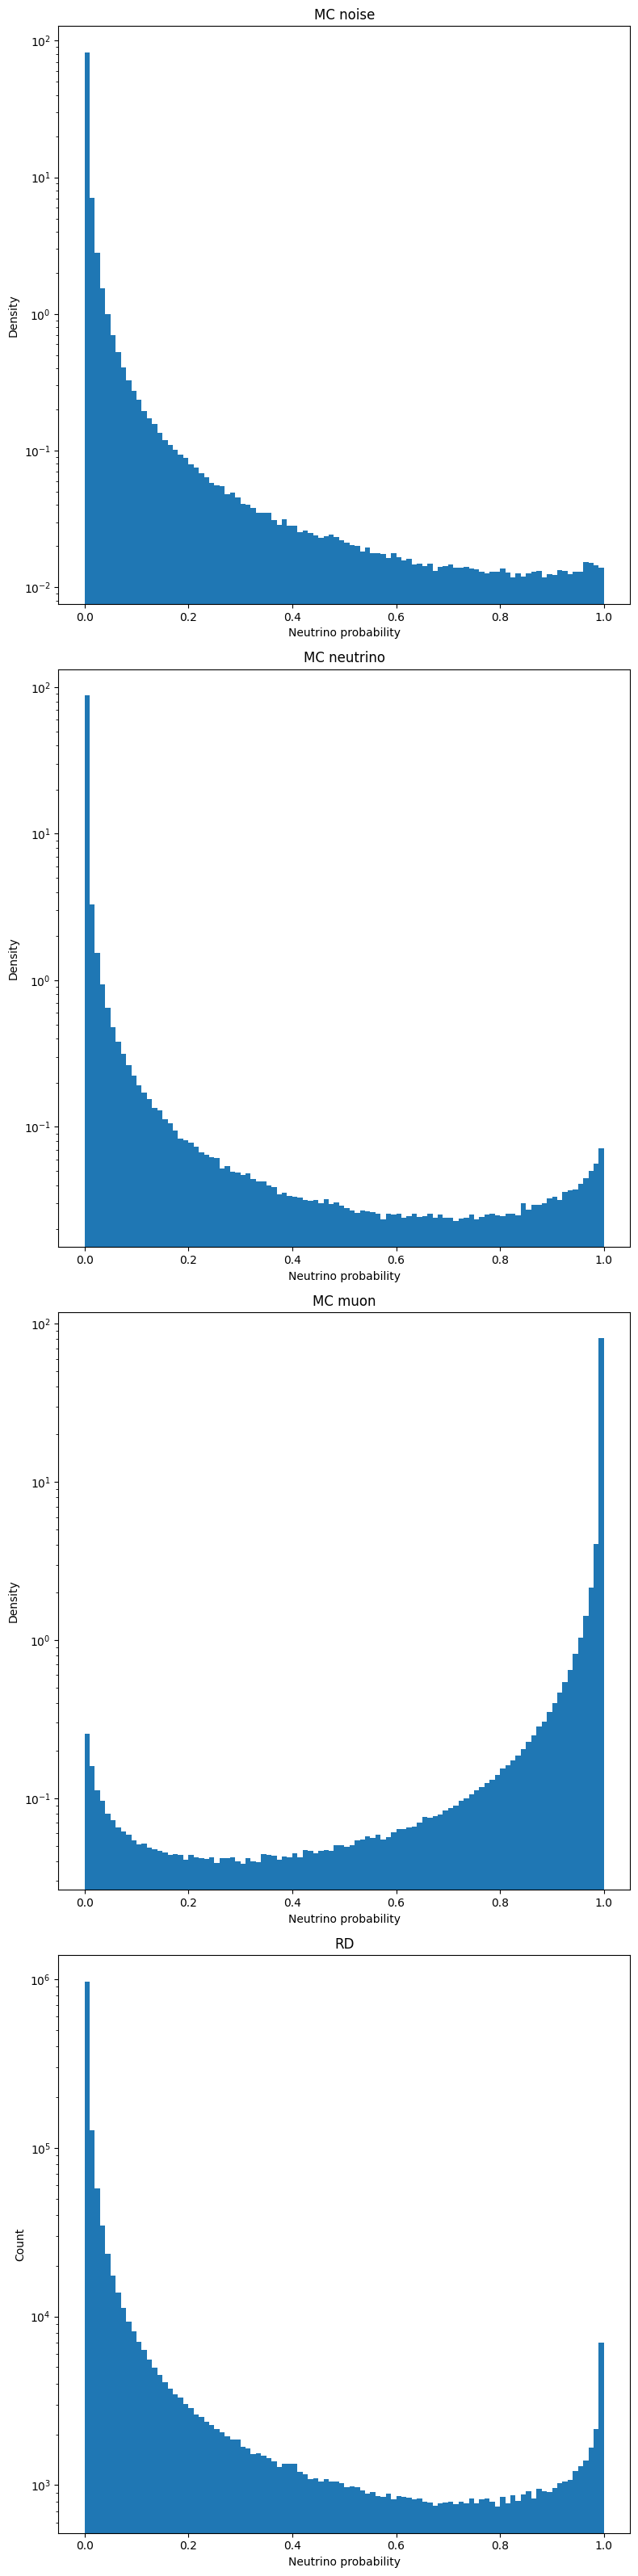

In [30]:
fig, axs = plt.subplots(4,1,sharex=False,figsize=(8, 32))

mask = dict()
counts = dict()
for i, item in enumerate(["noise", "neutrino", "muon"]): # class i; 0,1,2
    mask[item] = [True if truth_MC[j] == i else False for j in range(len(truth_MC))]
    counts[item], _, _ = axs[i].hist(results_MC['pid_neutrino_pred'].values[mask[item]],bins=bins_to_use,label=f'MC {item}',density=True);
    axs[i].set_ylabel('Density')
    axs[i].set_yscale('log')
    axs[i].set_xlabel('Neutrino probability')
    axs[i].set_title(f"MC {item}")

counts["RD"], _,_ = axs[3].hist(results_RD['pid_neutrino_pred'].values,bins=bins_to_use,label='RD')
axs[3].set_ylabel('Count')
axs[3].set_yscale('log')
axs[3].set_xlabel('Neutrino probability')
axs[3].set_title('RD')

fig.tight_layout()

print(counts["noise"][:5])
print(counts["RD"][:5])

[12915.90013628     0.            98.27337215]
True
noise:  [1059544.79259967   91341.67896913   36164.46401813   19958.40448865
   12823.20834376    8994.14645706    6780.8370034     5225.62309821
    4229.8686918     3528.45678288]
neutrino:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
muon:  [25.04346618 15.6462112  11.08455257  9.43298599  7.84891133  7.13032106
  6.45143192  6.07030117  5.76460255  5.28818912]


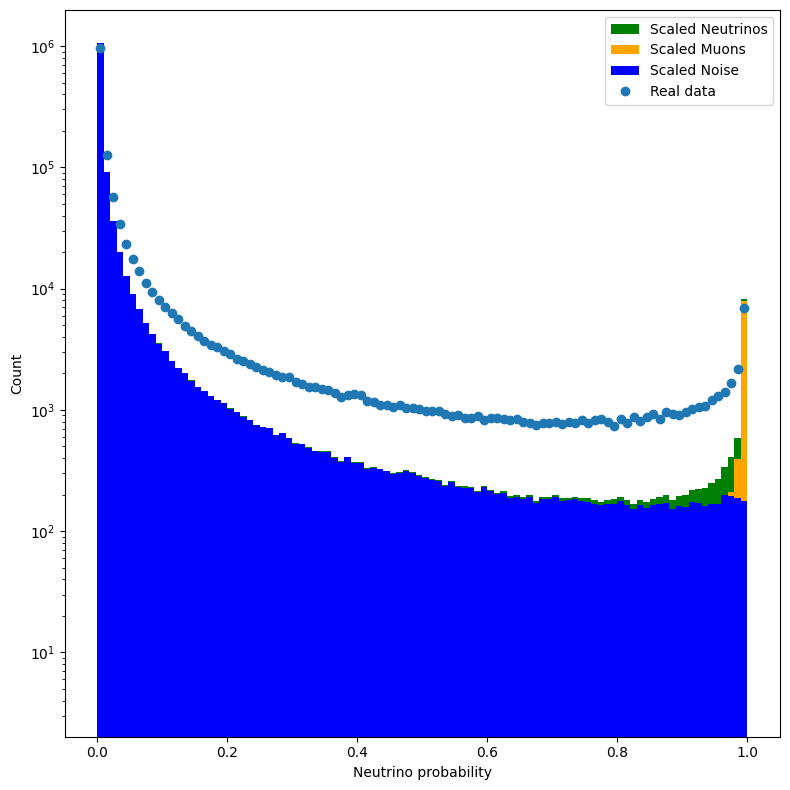

In [31]:
N_0 = [50000,50000,50000]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

N_test = [500000,500000,50000]
fig, axs = plt.subplots(figsize=(8, 8))

counts_fit = dict()
for i, item in enumerate(["noise", "muon", "neutrino"]):
    counts_fit[item] = counts[item]*res.x[i] #*N_test[0]
    print(f"{item}: ",counts_fit[item][:10])

axs.stairs(counts_fit["neutrino"], bins_to_use,baseline=(counts_fit["noise"]+counts_fit["muon"]),label='Scaled Neutrinos',fill=True,color='green')
axs.stairs(counts_fit["muon"], bins_to_use,baseline=counts_fit["noise"],label='Scaled Muons',fill=True,color='orange')
axs.stairs(counts_fit["noise"], bins_to_use,label='Scaled Noise',fill=True,color='blue')

axs.plot(bins_middle, counts["RD"],'o',label='Real data')
axs.set_xlabel('Neutrino probability')

axs.set_ylabel('Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()